In [205]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

# matplotlib preferences
mpl.rcdefaults()  # reset
plt.rc('axes', titlesize=20, labelsize=15, labelpad=2)
plt.rc('axes.formatter', limits=[-4, 4])
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('lines', linewidth=1, markersize=5)
plt.rc('figure', figsize=(5, 5))
# print(plt.rcParams) # all parameters

In [210]:
res = pd.read_csv("pre_opt_combined.csv")

dense = res[res["Type"]=="dense"]
dense = dense[["Size", "Density", "Time"]]
dense = dense.groupby(["Size", "Density"]).mean()

sparse = res[res["Type"]=="sparse"]
sparse = sparse[["Size", "Density", "Time"]]
sparse = sparse.groupby(["Size", "Density"]).mean()

improve = 100*(dense-sparse)/dense
display(improve)


Time
Size Density            
10   0.1       50.000000
     0.2             NaN
     0.3        0.000000
     0.4            -inf
     0.5        0.000000
     0.6     -200.000000
     0.7      100.000000
     0.8        0.000000
     0.9     -100.000000
     1.0        0.000000
20   0.1       50.000000
     0.2       66.666667
     0.3       50.000000
     0.4       50.000000
     0.5      100.000000
     0.6     -250.000000
     0.7     -150.000000
     0.8     -100.000000
     0.9      -33.333333
     1.0        0.000000
40   0.1       58.823529
     0.2       41.176471
     0.3      -33.333333
     0.4       35.294118
     0.5       10.000000
     0.6       21.428571
     0.7       30.769231
     0.8      -33.333333
     0.9      -11.111111
     1.0      -23.076923
...                  ...
1280 0.1       85.395764
     0.2       72.896986
     0.3       59.762231
     0.4       46.075085
     0.5       31.864257
     0.6       21.431728
     0.7        8.416270
     0.8       -7.800454
     0.9      -21.490504
     1.0      -36.971988
2560 0.1       86.205916
     0.2       73.558503
     0.3       60.001143
     0.4       43.721341
     0.5       33.146037
     0.6       23.022222
     0.7        6.824780
     0.8       -7.318187
     0.9      -16.732191
     1.0      -28.551653
5120 0.1       85.389545
     0.2       72.542298
     0.3       59.518288
     0.4       41.685417
     0.5       33.730986
     0.6       17.316636
     0.7        7.166404
     0.8       -8.598017
     0.9      -16.139626
     1.0      -33.507064

[100 rows x 1 columns]

5120 
               Time
Density           
0.1      85.389545
0.2      72.542298
0.3      59.518288
0.4      41.685417
0.5      33.730986
0.6      17.316636
0.7       7.166404
0.8      -8.598017
0.9     -16.139626
1.0     -33.507064


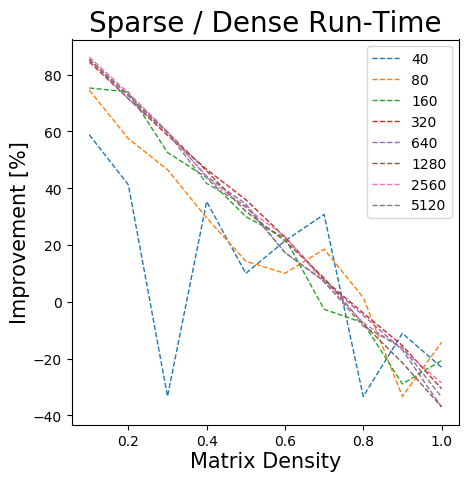

In [206]:
plt.close('all')
fig, ax = plt.subplots()

sizes = [40, 80, 160, 320, 640, 1280, 2560, 5120]
for size in sizes:
    line = improve.loc[size].plot(ax=ax, style='--', legend=False)
print(size, '\n', improve.loc[size])
ax.legend(sizes)
ax.set(ylabel="Improvement [%]", xlabel="Matrix Density",
       title="Sparse / Dense Run-Time")
plt.show()
fig.savefig("pre_opt.pdf")

In [228]:
res_opt = pd.read_csv("post_opt.csv")

dense_opt = res_opt[res_opt["Type"]=="dense"]
dense_opt = dense_opt[["Size", "Density", "Time"]]
dense_opt = dense_opt.groupby(["Size", "Density"]).mean()
diff_dense = (dense - dense_opt)/dense
display(diff_dense.loc[5120].mean())

sparse_opt = res_opt[res_opt["Type"]=="sparse"]
sparse_opt = sparse_opt[["Size", "Density", "Time"]]
sparse_opt = sparse_opt.groupby(["Size", "Density"]).mean()
diff_sparse = (sparse - sparse_opt)/sparse
display(diff_sparse.loc[5120].mean())

#diff_dense = diff_dense[diff_dense[]]
# improve = 100*(dense-sparse)/dense
# display(improve)

Time    0.540824
dtype: float64

Time    0.637324
dtype: float64

In [159]:
# ## OLD STUFF
# file_names = ["25_density_batch.csv", "50_density_batch.csv",
#               "75_density_batch.csv", "100_density_batch.csv"]
#     # load the results
# results = pd.concat([pd.read_csv(f) for f in file_names], ignore_index=True)
# results.keys()

#     # sort into types and average
# res_dense = results[results["Type"] == "dense"][["Size", "Density", "Time"]]
# res_dense = res_dense.groupby(["Size", "Density"]).mean()

# res_sparse = results[results["Type"] == "sparse"][["Size", "Density", "Time"]]
# res_sparse = res_sparse.groupby(["Size", "Density"]).mean()

#     # how much sparse is better than dense
# diff = res_dense - res_sparse
# diff = diff.unstack(level="Size")
# diff.columns = diff.columns.droplevel()

# print("Dense Matrices")
# display(res_dense)
# print("Sparse Matrices")
# display(res_sparse)
# print('diff')
# display(diff)

                 Time
Size Density         
10   0.25         0.0
20   0.25         0.4
40   0.25         1.0
80   0.25         4.6
160  0.25        16.4
320  0.25        51.8
640  0.25       177.0
1280 0.25       716.0
2560 0.25      2821.6
5120 0.25     11085.4
Index(['Time'], dtype='object')
                 Time
Size Density         
10   0.5          0.4
20   0.5          0.4
40   0.5          1.8
80   0.5          7.0
160  0.5         24.8
320  0.5         79.6
640  0.5        290.0
1280 0.5       1132.2
2560 0.5       4833.2
5120 0.5      17199.6
Index(['Time'], dtype='object')
                 Time
Size Density         
10   0.75         0.0
20   0.75         0.2
40   0.75         1.0
80   0.75         4.8
160  0.75        16.0
320  0.75        51.6
640  0.75       179.0
1280 0.75       706.4
2560 0.75      2728.6
5120 0.75     11400.0
Index(['Time'], dtype='object')
                 Time
Size Density         
10   1.0          0.2
20   1.0          0.6
40   1.0          1.4
80

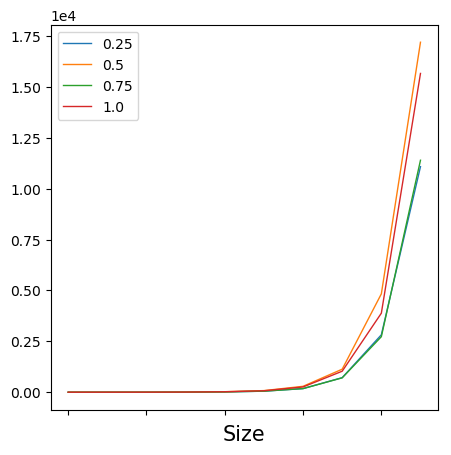

In [129]:
## MORE OLD STUFF
# fig, ax = plt.subplots()

# for key, grp in res_sparse.groupby("Density"):
#     print(grp)
#     print(grp.keys())
#     grp.plot(ax=ax, kind='line', y='Time', label=key)
# ax.set(xlabel="")
# #     res_dense.plot(x="Density", y="Time", ax=ax)

# plt.show()